## Downloading required packages and dataset

In [15]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer # importing the CIFAR10 dataset



## Exploring the dataset

In [2]:
breast = load_breast_cancer()
breast_data = breast.data
print('breast_data.shape', breast_data.shape)
breast_labels = breast.target
print('breast_labels.shape', breast_labels.shape)
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
print('final_breast_data.shape', final_breast_data.shape)

breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
print("features",features)
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()



x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()


breast_data.shape (569, 30)
breast_labels.shape (569,)
final_breast_data.shape (569, 31)
features ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


## 2.1. Testing different number of components

### Case 1: Number of components will be set to 2

<Figure size 640x480 with 0 Axes>

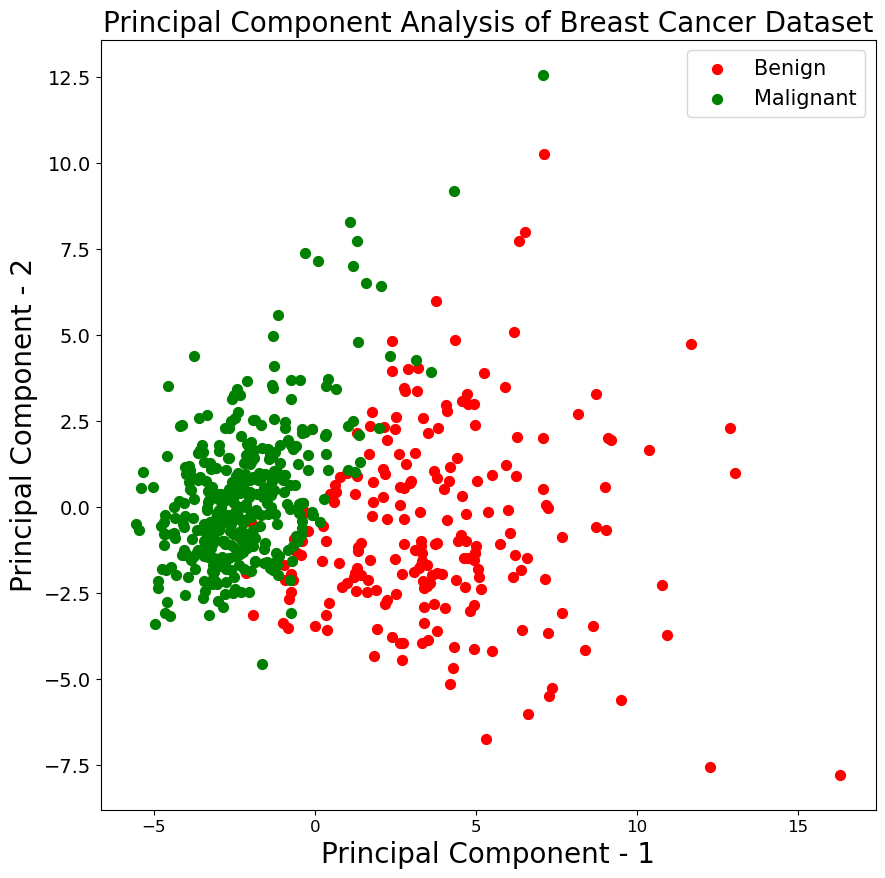

In [3]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


### Case 2: Number of components will be set to 3

<Figure size 640x480 with 0 Axes>

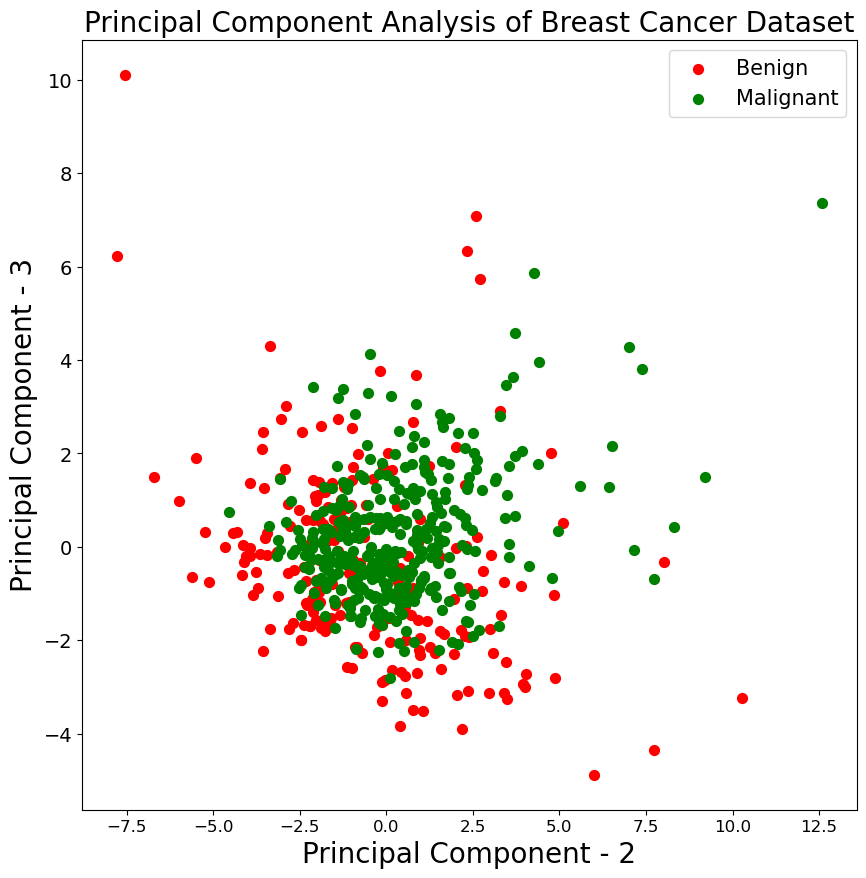

In [5]:
pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_breast_Df.tail()
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 2',fontsize=20)
plt.ylabel('Principal Component - 3',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 2']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 3'],
                 c = color, s = 50)

plt.legend(targets,prop={'size': 15})


### Case 3: Number of components will be set to 4

<Figure size 640x480 with 0 Axes>

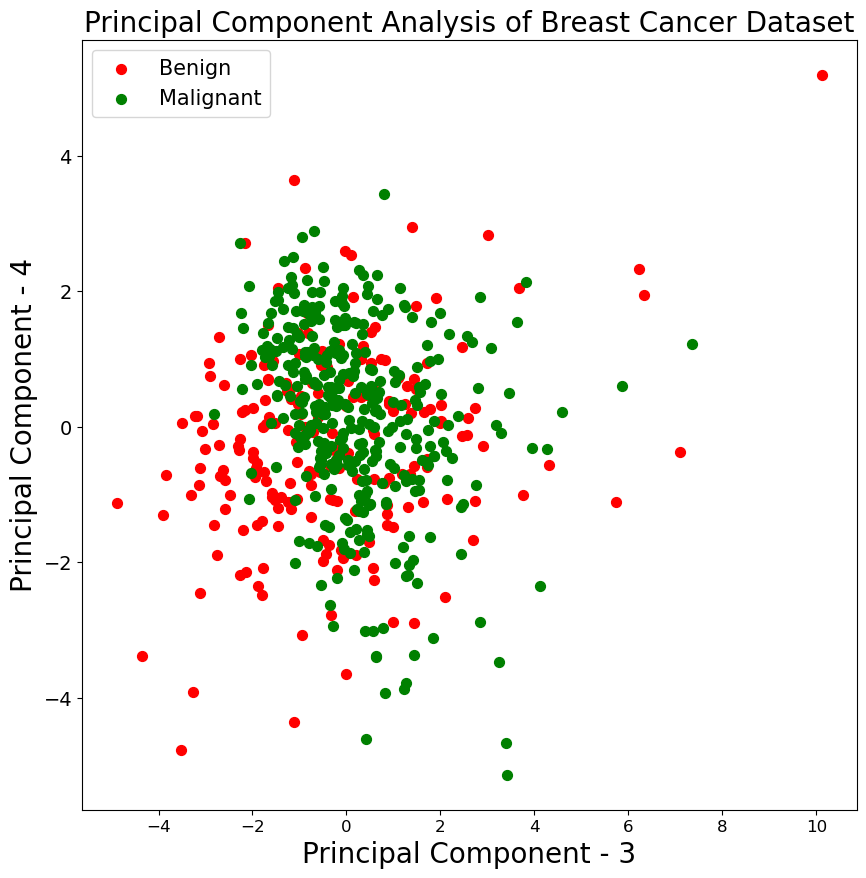

In [6]:
pca_breast = PCA(n_components=4)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
principal_breast_Df.tail()
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 3',fontsize=20)
plt.ylabel('Principal Component - 4',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 3'],
                 principal_breast_Df.loc[indicesToKeep, 'principal component 4'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


### Case 4: Number of components will be set to 5

<Figure size 640x480 with 0 Axes>

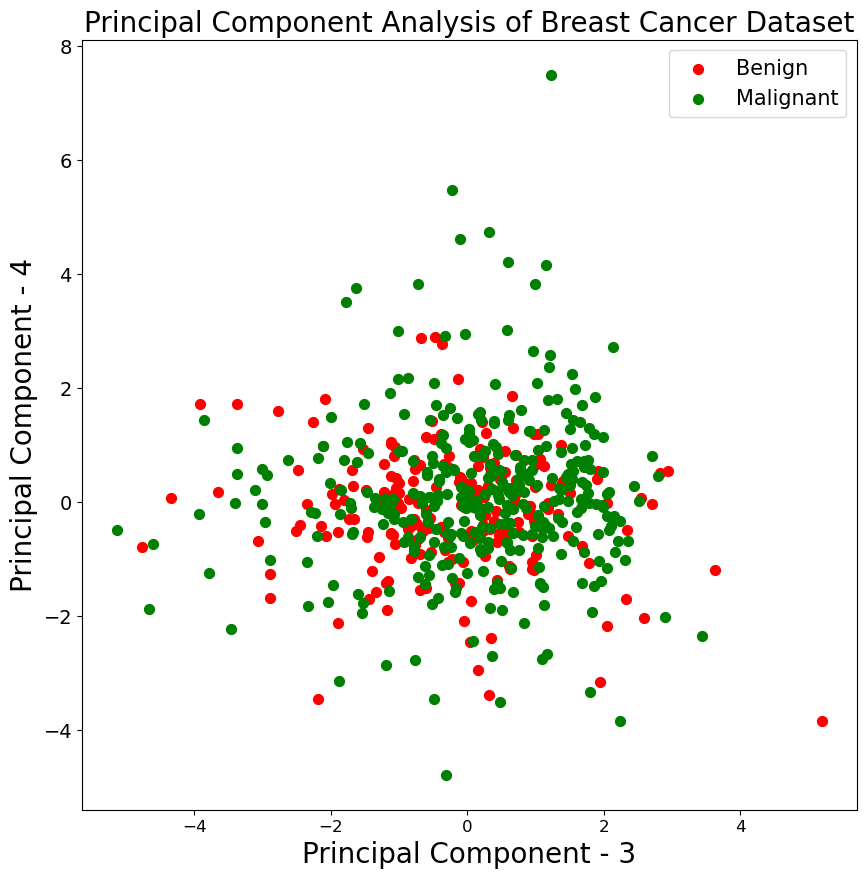

In [8]:
pca_breast = PCA(n_components=5)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4', 'principal component 5'])
principal_breast_Df.tail()
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 3',fontsize=20)
plt.ylabel('Principal Component - 4',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 4'],
                 principal_breast_Df.loc[indicesToKeep, 'principal component 5'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


### Diplaying ```explained_variance_ratio``` using a bar chart

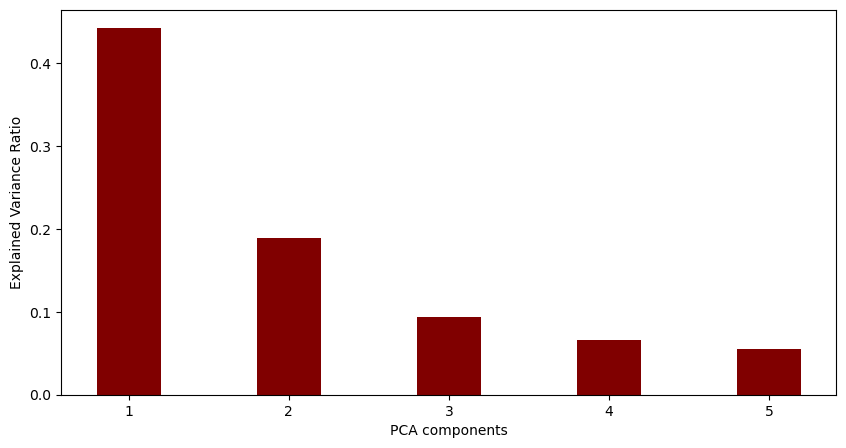

In [10]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(list(range(1, pca_breast.n_components_+1)), pca_breast.explained_variance_ratio_, color ='maroon', 
        width = 0.4)
 
plt.xlabel("PCA components")
plt.ylabel("Explained Variance Ratio")
plt.show()

## 2.2. Speeding Up ML for diffent variance ratios

### 2.2.1 Case 1: PCA will hold 90% of the variance

### 2.2.2 Case 2: PCA will hold 80% of the variance

### 2.2.3 Case 3: PCA will hold 70% of the variance

### 2.2.4 Case 4: PCA will hold 60% of the variance

### 2.2.5 Case 5: PCA will hold 50% of the variance